In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import

train_df = pd.read_csv(
    'train.csv', 
    low_memory=False, 
    nrows=10**6, 
    dtype={
        'row_id': 'int64', 
        'timestamp': 'int64', 
        'user_id': 'int32', 
        'content_id': 'int16', 
        'content_type_id': 'int8',
        'task_container_id': 'int16', 
        'user_answer': 'int8', 
        'answered_correctly': 'int8', 
        'prior_question_elapsed_time': 'float32', 
        'prior_question_had_explanation': 'boolean'
    }
)

In [14]:
train_df.shape()

TypeError: 'tuple' object is not callable

In [3]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25319.472656
std,288675.278933,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19707.429688
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


In [4]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25319.472656
std,288675.278933,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19707.429688
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


In [5]:
user_count = train_df['user_id'].value_counts().reset_index()
user_count.columns = ['user_id', 'count']
user_count30 = user_count.sort_values(by = ['count'], ascending = False).iloc[:30]


<AxesSubplot:title={'center':'Most Actions Taken - Top 30 Users'}, xlabel='Number of actions taken by user', ylabel='Top 30 Users'>

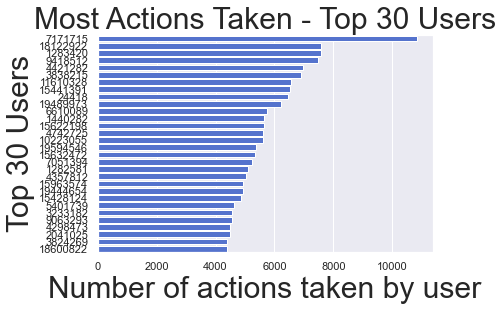

In [6]:
sns.set_theme(style="darkgrid")
p = sns.barplot(x = 'count',y ='user_id', data = user_count30,  
                color="royalblue",
                orient = "h",
                order= user_count30.sort_values('count',ascending = False).user_id,
            
       )
plt.xlabel('Number of actions taken by user', fontsize = 30)
plt.ylabel('Top 30 Users', fontsize = 30)
plt.title('Most Actions Taken - Top 30 Users', fontsize = 30)
plt.rcParams["figure.figsize"]= 26,26
p

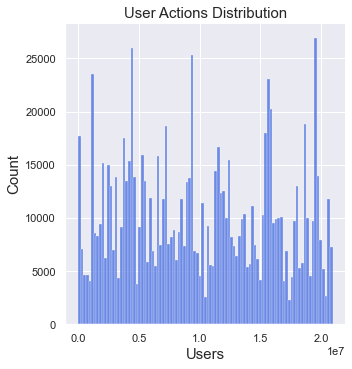

In [7]:
p= sns.displot(x ='user_id', data = train_df,  
                color = 'royalblue'
       )
plt.xlabel('Users', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('User Actions Distribution', fontsize = 15)
# sns.set_theme(style="darkgrid")
p

In [8]:
# plotting content_id distribution
content = train_df['content_id'].value_counts().reset_index()
user_count.columns = ['content_id', 'count']

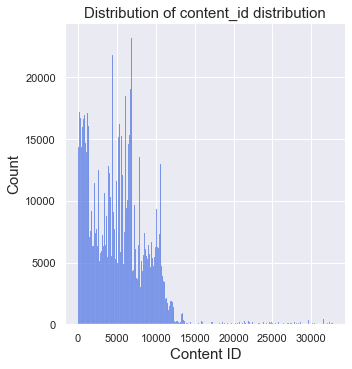

In [9]:
sns.set_theme(style="darkgrid")
p= sns.displot(x ='content_id', data = train_df,  
                color = 'royalblue'
       )
plt.xlabel('Content ID', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of content_id distribution', fontsize = 15)
plt.rcParams["figure.figsize"]= 26,26
p

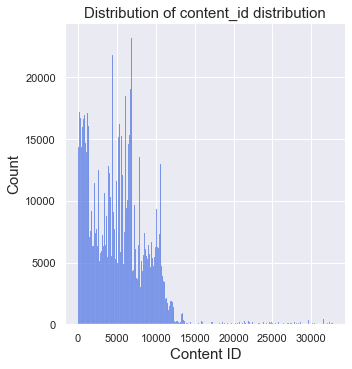

In [10]:
sns.set_theme(style="darkgrid")
p= sns.displot(x ='content_id', data = train_df,  
                color = 'royalblue'
       )
plt.xlabel('Content ID', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of content_id distribution', fontsize = 15)
plt.rcParams["figure.figsize"]= 26,26
p